# MPC Test

In [1]:
%matplotlib widget

In [2]:
from NMPC_Net.simulation import simulation
import numpy as np
from NMPC_Net.controller import pyomo_controller
from functools import partial
from NMPC_Net.controller.MPC import MPC, MPCParams
from NMPC_Net.dataset.dataset import Dataset
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
plt.ion()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [18]:
### SIM EXAMPLE (10 Hz)
dataset = Dataset()
initial = dataset._get_rand_x0()
final = dataset._get_rand_xf(initial)

In [19]:
print(f"Initial: {initial.T[0,:]}")
print(f"Final: {final.T[0,:]}")
# initial = np.array([0, 0,2.6161398,0]).reshape((4,1))
# final = np.array([ 3.79598706e+01, -8.87147668e+01 , 1.85896548e+00, -6.88075265e-02]).reshape((4,1))
params = MPCParams()
params.H = 10 # seconds
controller = MPC(params=params)
sim = simulation.Simulation(initial, final, 5.0, controller, stop_r=1.0)
sim.run_simulation(20.0)

Initial: [0.         0.         0.35632235 0.        ]
Final: [ 1.86502903 75.43125509  0.          0.52517124]
0: Sim time: 0.0/20.0                        Wall Time: 0:00:00.000007
1: Sim time: 0.2/20.0                        Wall Time: 0:00:00.209946
2: Sim time: 0.4/20.0                        Wall Time: 0:00:00.302503
3: Sim time: 0.6000000000000001/20.0                        Wall Time: 0:00:00.399599
4: Sim time: 0.8/20.0                        Wall Time: 0:00:00.492356
5: Sim time: 1.0/20.0                        Wall Time: 0:00:00.588676
6: Sim time: 1.2/20.0                        Wall Time: 0:00:00.682687
7: Sim time: 1.4/20.0                        Wall Time: 0:00:00.781409
8: Sim time: 1.5999999999999999/20.0                        Wall Time: 0:00:00.883924
9: Sim time: 1.7999999999999998/20.0                        Wall Time: 0:00:00.982934
10: Sim time: 1.9999999999999998/20.0                        Wall Time: 0:00:01.082504
11: Sim time: 2.1999999999999997/20.0         

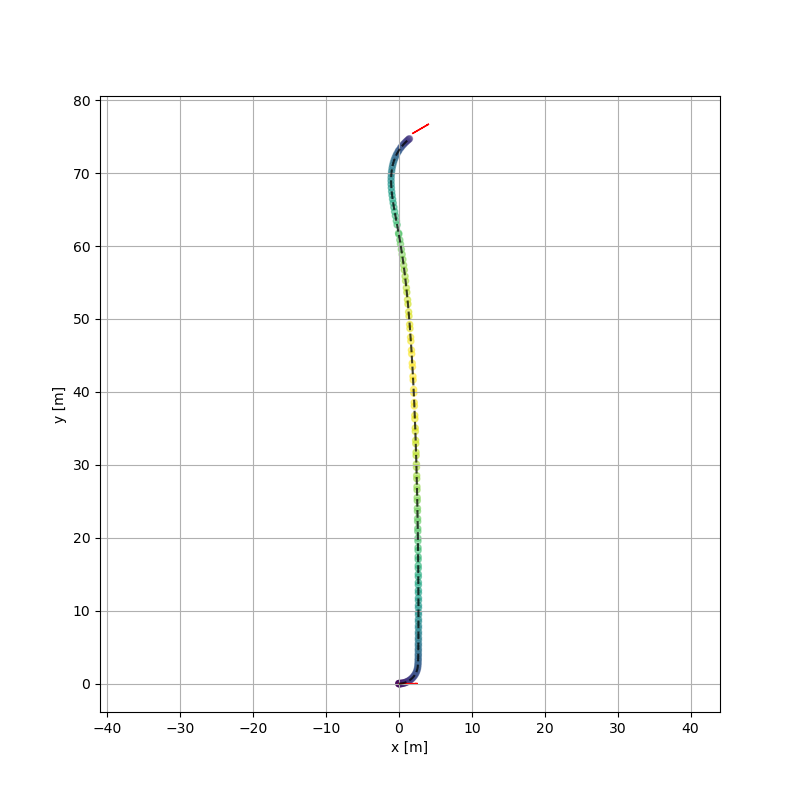

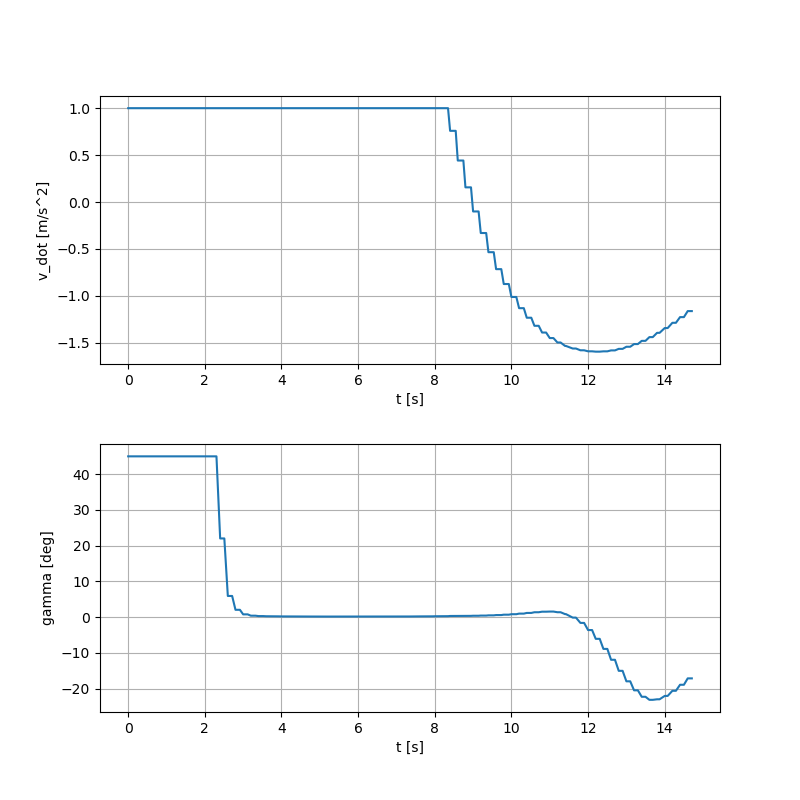

In [20]:
simulation.plot_path(sim)
simulation.plot_input(sim)